In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Importing Data in Python & Exploring it 

In [2]:
data = pd.read_excel("cars_Data_full.xlsx",keep_default_na=False)

#display(data.head(4).transpose())
#display(data.tail(3).transpose())
data.head()

,Price,Age,KM,Fuel,HP,MC,Color,Auto,CC,Drs,...,AC,Comp,CD,Clock,Pwin,PStr,Radio,SpM,M_Rim,Tow_Bar
0,21000,26,31463,Petrol,195,0,Silver,0,1800,3,...,1,0,1,1,1,1,0,0,1,0
1,20000,23,43612,Petrol,195,0,Red,0,1800,3,...,1,1,0,1,1,1,0,1,1,0
2,19650,26,32191,Petrol,195,0,Red,0,1800,3,...,1,1,0,1,1,1,0,1,1,0
3,21550,32,23002,Petrol,195,1,Black,0,1800,3,...,1,1,1,1,1,1,0,1,1,0
4,22550,33,34133,Petrol,195,1,Grey,0,1800,3,...,1,1,1,1,1,1,0,1,1,0


In [3]:
data.shape


(1367, 28)

### Dataset is having 28 columns & 1367 rows

In [4]:
data.Fuel.unique()

array(['Petrol', 'Diesel'], dtype=object)

## Two types of Fuel & we will be converting it integer for materical calculation


### All Columns list 

In [5]:
data.columns

Index(['Price', 'Age', 'KM', 'Fuel', 'HP', 'MC', 'Color', 'Auto', 'CC', 'Drs',
       'Cyl', 'Grs', 'Wght', 'G_P', 'Mfr_G', 'ABS', 'Abag_1', 'Abag_2', 'AC',
       'Comp', 'CD', 'Clock', 'Pwin', 'PStr', 'Radio', 'SpM', 'M_Rim',
       'Tow_Bar'],
      dtype='object')

In [6]:
data.describe()

,Price,Age,KM,HP,MC,Auto,CC,Drs,Cyl,Grs,...,AC,Comp,CD,Clock,Pwin,PStr,Radio,SpM,M_Rim,Tow_Bar
count,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.0,1367.000000,...,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000
mean,10682.416971,57.656913,68605.495245,104.464521,0.671544,0.057791,1574.811266,4.036576,3.0,5.027798,...,0.055596,0.281639,0.211412,0.574250,0.555230,0.977323,0.145574,0.304316,0.199707,0.280176
std,3555.986256,18.043061,36797.747240,14.918030,0.469824,0.233433,432.544394,0.953598,0.0,0.181388,...,0.229224,0.449963,0.408459,0.494637,0.497122,0.148927,0.352808,0.460286,0.399927,0.449249
min,4400.000000,5.000000,3.000000,72.000000,0.000000,0.000000,1300.000000,2.000000,3.0,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8500.000000,47.000000,43002.000000,89.000000,0.000000,0.000000,1400.000000,3.000000,3.0,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9945.000000,62.000000,64002.000000,113.000000,1.000000,0.000000,1600.000000,4.000000,3.0,5.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,11800.000000,71.000000,87180.500000,113.000000,1.000000,0.000000,1600.000000,5.000000,3.0,5.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,32550.000000,81.000000,232942.000000,195.000000,1.000000,1.000000,16000.000000,5.000000,3.0,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Coverting colors in numerical value

In [3]:
data.Color.unique()
data.replace({'Color':{'Silver': 0, 'Red':1,
'Black': 2, 'Grey':3,
'Blue': 4, 'Green':5,
'White': 6, 'Yellow':7 }}, inplace=True)

In [4]:
data.iloc[:,[0,1,2,3,4,6,8,12,18,19]]

,Price,Age,KM,Fuel,HP,Color,CC,Wght,AC,Comp
0,21000,26,31463,Petrol,195,Silver,1800,1189,1,0
1,20000,23,43612,Petrol,195,Red,1800,1189,1,1
2,19650,26,32191,Petrol,195,Red,1800,1189,1,1
3,21550,32,23002,Petrol,195,Black,1800,1189,1,1
4,22550,33,34133,Petrol,195,Grey,1800,1189,1,1
...,...,...,...,...,...,...,...,...,...,...
1362,7550,70,20546,Petrol,89,Blue,1300,1029,0,0
1363,10895,73,19002,Petrol,89,Grey,1300,1019,0,0
1364,8550,72,17018,Petrol,89,Blue,1300,1019,0,0
1365,7300,71,16918,Petrol,89,Grey,1300,1019,0,0


### for correlation converting Petrol to 0 and Diesel to 1 

In [4]:
data.replace({'Fuel':{'Petrol': 0, 'Diesel':1}}, inplace=True)


Text(0.5, 1.0, 'Correlation between Columns')

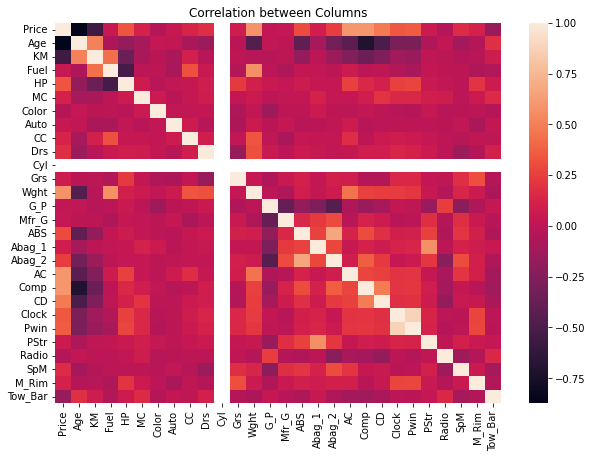

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(data.iloc[:,:].corr(), annot=False)
plt.title('Correlation between Columns')


Text(0.5, 1.0, 'Correlation between specific Columns')

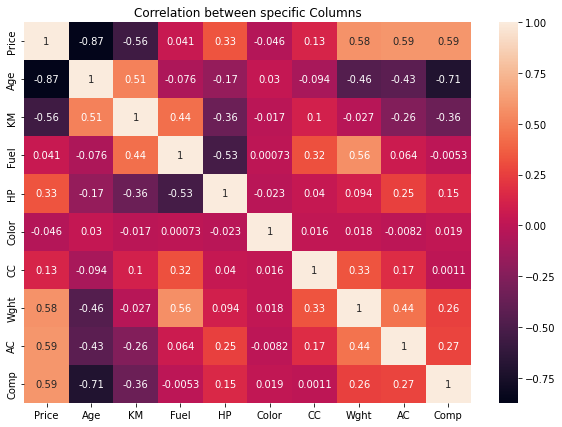

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap( data.iloc[:,[0,1,2,3,4,6,8,12,18,19]].corr(), annot=True)
plt.title('Correlation between specific Columns')


<AxesSubplot: title={'center': 'Correlation between HP & Price'}, xlabel='Price', ylabel='HP'>

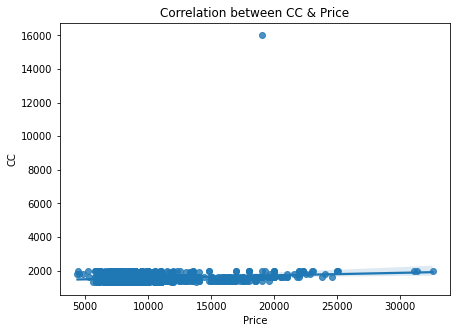

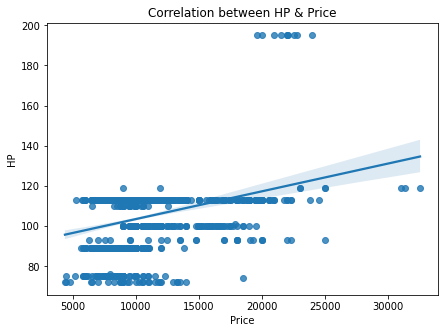

In [25]:
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between CC & Price')
sns.regplot(x='Price', y='CC', data=data )
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between HP & Price')
sns.regplot(x='Price', y='HP', data=data )

We just found out an Outlier & Cleaning it 

In [13]:
data.CC.max()   

16000

And it's should 1600

In [26]:
data.loc[(data['CC'] == 1600) ]
#data.CC.unique()

,Price,Age,KM,Fuel,HP,MC,Color,Auto,CC,Drs,...,AC,Comp,CD,Clock,Pwin,PStr,Radio,SpM,M_Rim,Tow_Bar
7,18000,25,21718,0,113,1,4,0,1600,3,...,0,0,0,1,1,1,1,0,0,1
8,16800,25,25565,0,113,0,3,0,1600,3,...,1,1,1,1,1,1,0,0,0,0
9,17000,31,64361,0,113,1,3,0,1600,3,...,0,1,1,1,1,1,0,1,0,0
10,16000,31,67662,0,113,1,4,0,1600,3,...,0,1,1,1,1,1,0,1,0,1
11,17000,30,43907,0,113,0,3,1,1600,3,...,1,1,0,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,8800,80,39802,0,110,0,5,1,1600,3,...,0,0,0,0,0,1,0,1,0,0
1351,8200,77,36539,0,113,0,1,1,1600,4,...,0,0,0,0,0,0,0,0,0,0
1353,7650,79,36002,0,113,1,4,0,1600,3,...,0,0,0,1,1,1,0,0,1,0
1357,10000,79,30966,0,113,0,0,1,1600,3,...,0,0,0,0,0,1,0,0,0,1


In [5]:
data.iloc[[70],[8]] = 1600

<AxesSubplot: title={'center': 'Correlation between CC & Price'}, xlabel='Price', ylabel='CC'>

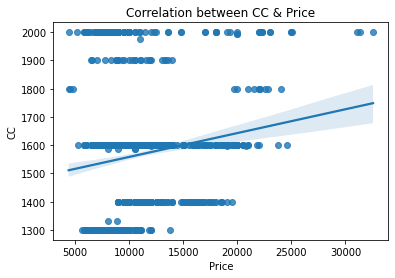

In [16]:
plt.title('Correlation between CC & Price')
sns.regplot(x='Price', y='CC', data=data )

Let's plot it again AGE & Price, it shows negative correlation between age & Price

<AxesSubplot: title={'center': 'Correlation between Age & Price'}, xlabel='Price', ylabel='Age'>

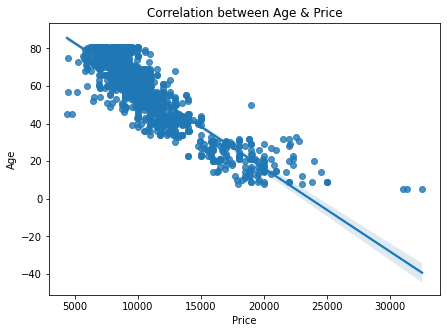

In [17]:
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between Age & Price')
sns.regplot(x='Price', y='Age', data=data )


## Now are preprating the data using linear regression model 

In [18]:
#X = data.iloc[:,1:]
X = data.drop(['Price'],axis=1)
y = data['Price']
print(X.shape)
print(y.shape)


(1367, 27)
(1367,)


### Spliting datas for Train & Test
# X having all columns except the price 
# Y having the prices 

### we are spliting datas in train & test 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .1, random_state = 55)


NameError: name 'X' is not defined

In [20]:
scaler = StandardScaler()

### We scaling the values 

In [21]:

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)


### Selecting the Linear Regression Model & Fitting into the model

In [22]:
model = LinearRegression()


In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
pred = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Here we are checking out Lineal Regression model performance by Mean absolute error, mean squared error and R squared error

In [26]:
print('MAE:', (metrics.mean_absolute_error(pred,y_test)))
print('MSE:', (metrics.mean_squared_error(pred,y_test)))
print('R2 score:', (metrics.r2_score(pred,y_test)))
LR_MAE=(metrics.mean_absolute_error(pred,y_test))
LR_MSE=(metrics.mean_squared_error(pred,y_test))



MAE: 786.4509505046722
MSE: 1184599.4835632883
R2 score: 0.8918070591349443


### Let's check out the acutal price & predicted price using linear regression model

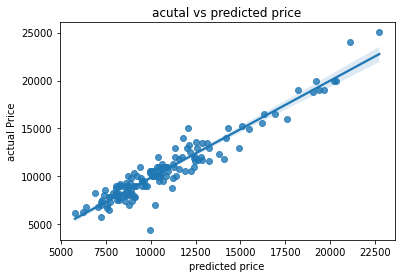

In [27]:
sns.regplot(x=pred, y=y_test)
plt.xlabel('predicted price')
plt.ylabel('actual Price')
plt.title('acutal vs predicted price')
plt.show()

In [28]:
predictions = model.predict(X_test[:5])
print("predicted value:", predictions.round())
print('real value:', y_test[:5])

predicted value: [12258. 10459.  8919.  9407. 13234.]
real value: 323    10550
391    10945
722     9800
720    11000
239    13000
Name: Price, dtype: int64


Predicted value : acutal value  
 
12258 : 10550  
10459 : 10945  
8919  : 9800  
9407  : 11000   
13234 : 13000

# Now Let's try out another model from Neural Network 

In [7]:
import tensorflow 
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .1, random_state = 55)

scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#model.fit(X_train, y_train)
#model.fit(X_train, y_train)


NameError: name 'X' is not defined

In [8]:
model = Sequential()

#experiment with deeper & wider network 
model.add(Dense(128, input_dim=27, activation="relu"))
model.add(Dense(64, activation='relu'))

#output layer
model.add(Dense(1, activation = 'linear'))


NameError: name 'Sequential' is not defined

In [35]:
model.compile(loss='mean_squared_error', optimizer ='adam',metrics=['mae'])


In [36]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=
100)
#model.fit(X_train, y_train)


Epoch 1/100
31/31 [==============================] - 1s 12ms/step - loss: 126088136.0000 - mae: 10648.2393 - val_loss: 128105504.0000 - val_mae: 10754.1602
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 125850072.0000 - mae: 10637.8750 - val_loss: 127713632.0000 - val_mae: 10737.3398
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 125231560.0000 - mae: 10611.6641 - val_loss: 126731608.0000 - val_mae: 10696.8291
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 123821792.0000 - mae: 10554.1631 - val_loss: 124692136.0000 - val_mae: 10614.1934
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 121126824.0000 - mae: 10446.3301 - val_loss: 121109952.0000 - val_mae: 10469.9033
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 116763528.0000 - mae: 10268.1914 - val_loss: 115539832.0000 - val_mae: 10242.8701
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - lo

31/31 [==============================] - 0s 4ms/step - loss: 1902291.5000 - mae: 1053.6133 - val_loss: 2433594.0000 - val_mae: 1200.8048
Epoch 56/100
31/31 [==============================] - 0s 3ms/step - loss: 1866736.0000 - mae: 1044.3685 - val_loss: 2388776.2500 - val_mae: 1189.6852
Epoch 57/100
31/31 [==============================] - 0s 5ms/step - loss: 1834152.7500 - mae: 1036.0468 - val_loss: 2344360.5000 - val_mae: 1178.6622
Epoch 58/100
31/31 [==============================] - 0s 6ms/step - loss: 1801021.8750 - mae: 1027.3032 - val_loss: 2316124.0000 - val_mae: 1168.9604
Epoch 59/100
31/31 [==============================] - 0s 3ms/step - loss: 1768519.1250 - mae: 1018.7235 - val_loss: 2276642.7500 - val_mae: 1157.8601
Epoch 60/100
31/31 [==============================] - 0s 4ms/step - loss: 1738995.8750 - mae: 1010.3447 - val_loss: 2243476.2500 - val_mae: 1148.2847
Epoch 61/100
31/31 [==============================] - 0s 4ms/step - loss: 1709947.7500 - mae: 1002.2960 - val_los

In [37]:
predictions = model.predict(X_test[:5])
print("predicted value:", predictions.round())
print('real value:', y_test[:5])

1/1 [==============================] - 0s 136ms/step
predicted value: [[10897.]
 [10200.]
 [ 8549.]
 [ 9540.]
 [12817.]]
real value: 323    10550
391    10945
722     9800
720    11000
239    13000
Name: Price, dtype: int64


Predicted value : acutal value  
 
10897 : 10550  
10200 : 10945  
8549  : 9800  
9540  : 11000   
12817 : 13000

In [38]:
mse_neural, mae_neural = model.evaluate(X_test, y_test)
print('MSE for Neural Network:', mse_neural)
print('MAE for Neural Network:', mae_neural)


5/5 [==============================] - 0s 2ms/step - loss: 1196075.7500 - mae: 847.7484
MSE for Neural Network: 1196075.75
MAE for Neural Network: 847.7484130859375


In [39]:
print('MSE for Neural Network:', mse_neural)
print('MSE for Linear Regression :',LR_MSE)
print('')
print('MAE for Neural Network:', mae_neural)
print('MAE for Linear Regression:',LR_MAE)


MSE for Neural Network: 1196075.75
MSE for Linear Regression : 1184599.4835632883

MAE for Neural Network: 847.7484130859375
MAE for Linear Regression: 786.4509505046722


Let's run model on 
'Age', 'KM', 'Fuel', 'HP', 'Color', 'CC', 'Wght', 'AC','Comp'

In [12]:
data.iloc[:,[0,1,2,3,4,6,8,12,18,19]].columns

Index(['Price', 'Age', 'KM', 'Fuel', 'HP', 'Color', 'CC', 'Wght', 'AC',
       'Comp'],
      dtype='object')

In [14]:
X = data.iloc[:,[1,2,3,4,6,8,12,18,19]]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .1, random_state = 55)
scaler = StandardScaler()   
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear Regression 

In [19]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_predict_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test,y_predict_lr)
mae_lr = mean_absolute_error(y_test,y_predict_lr)
print('MSE for Linear', mse_lr)
print('MAE for Linear', mae_lr)


MSE for Linear 1244783.566041307
MAE for Linear 817.0531754313996


Neural Network 

In [20]:
import tensorflow 
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

#experiment with deeper & wider network 
model.add(Dense(128, input_dim=9, activation="relu"))
model.add(Dense(64, activation='relu'))

#output layer
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mean_squared_error', optimizer ='adam',metrics=['mae'])

#history = model.fit(X_train, y_train, validation_split=0.2, epochs=
#100)

mse_neural, mae_neural = model.evaluate(X_test, y_test)
print('MSE for Neural Network:', mse_neural)
print('MAE for Neural Network:', mae_neural)


5/5 [==============================] - 0s 2ms/step - loss: 128407600.0000 - mae: 10769.1914
MSE for Neural Network: 128407600.0
MAE for Neural Network: 10769.19140625


In [17]:
print('MSE for Neural Network:', mse_neural)
print('MSE for Linear Regression :',mse_lr)
print('')
print('MAE for Neural Network:', mae_neural)
print('MAE for Linear Regression:', mae_lr)

MSE for Neural Network: 1474304.375
MSE for Linear Regression : 1244783.566041307

MAE for Neural Network: 928.55078125
MAE for Linear Regression: 817.0531754313996
